<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Student_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV , learning_curve , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report , accuracy_score , roc_curve
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [4]:
df = pd.read_csv("dataset.csv" , sep=';')

In [5]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [7]:
df.shape

(4424, 35)

In [8]:
df.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [9]:
df.isna().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


<Axes: xlabel='count', ylabel='Target'>

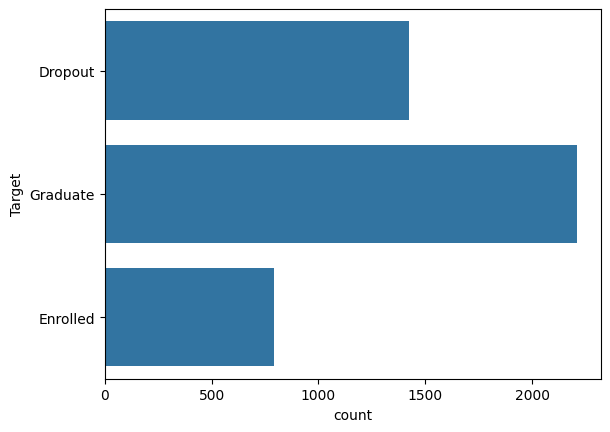

In [10]:
sns.countplot(df['Target'])

In [11]:
df['Target'].value_counts() / len(df['Target']) * 100

,count
Target,
Graduate,49.932188
Dropout,32.120253
Enrolled,17.947559


In [12]:
df['Target'] = df['Target'].map(dict(Dropout = 0 , Enrolled = 2 , Graduate = 1))

In [13]:
df = df[df['Target'] != 2]

In [14]:
df['Target'].value_counts()

,count
Target,
1,2209
0,1421


In [15]:
x = df.drop('Target' , axis=1)
y = df['Target']

In [16]:
x.shape

(3630, 34)

In [17]:
scaler = MinMaxScaler()
xscaled = scaler.fit_transform(x)
xscaled = pd.DataFrame(xscaled , columns=x.columns)

In [18]:
from sklearn.feature_selection import SelectKBest , chi2
selk = SelectKBest(chi2 , k=12)
xnew = selk.fit_transform(xscaled , y)
print(x.shape)
print(x.columns[selk.get_support()].to_list())
x = xnew

(3630, 34)
['Application mode', 'Previous qualification', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


In [19]:
x = pd.DataFrame(x, columns=xscaled.columns[selk.get_support()].to_list())

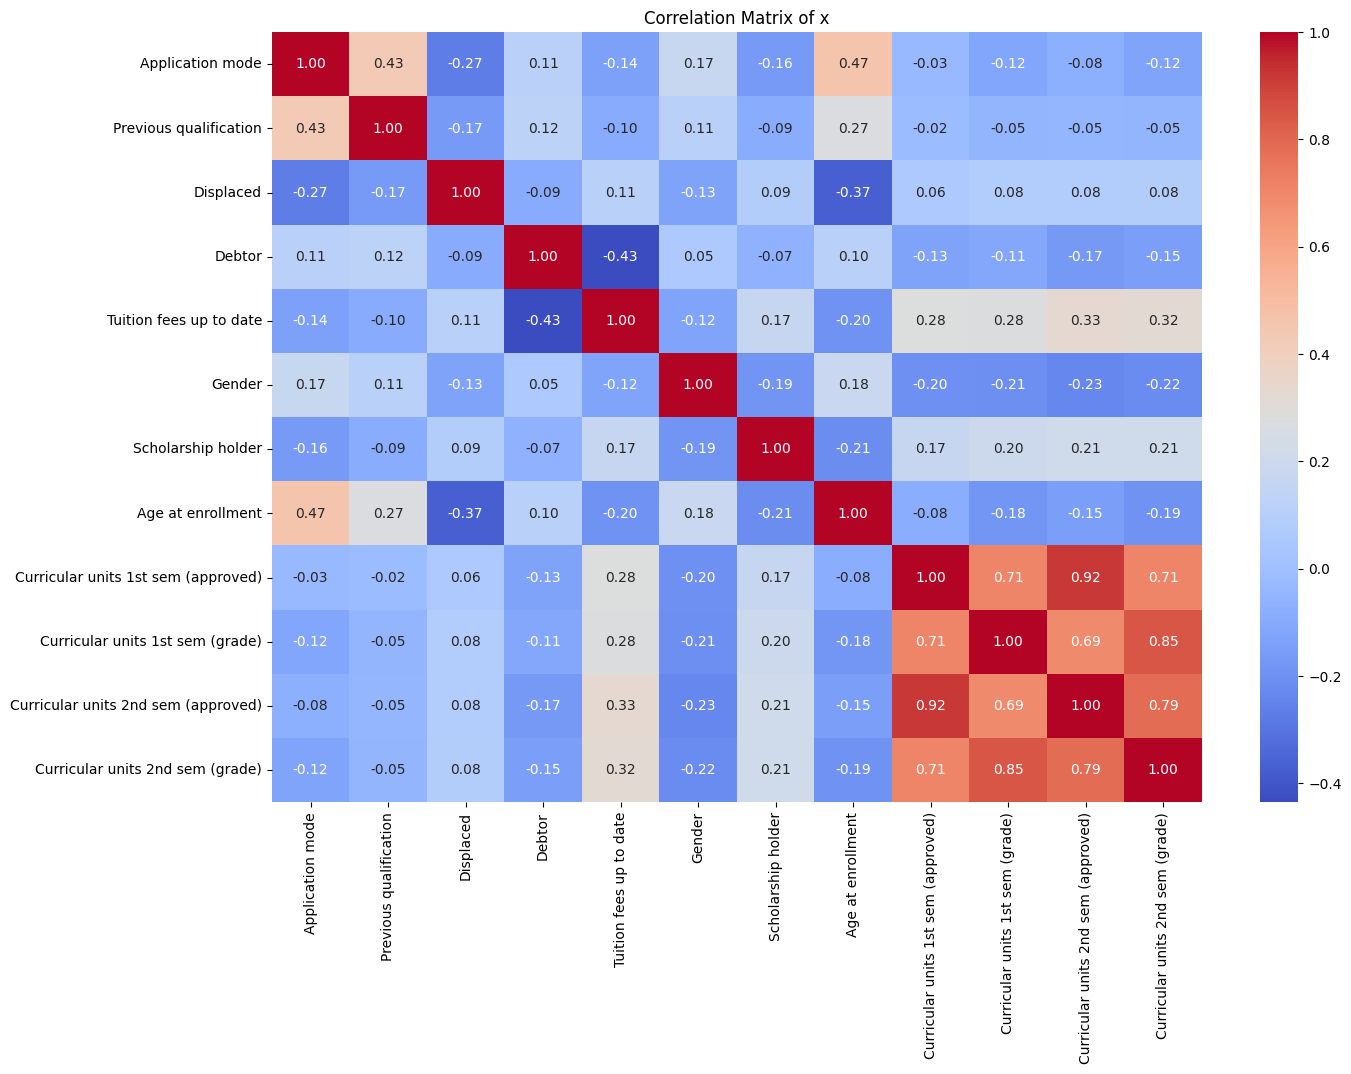

In [20]:
correlation_matrix = x.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of x')
plt.show()

<Axes: >

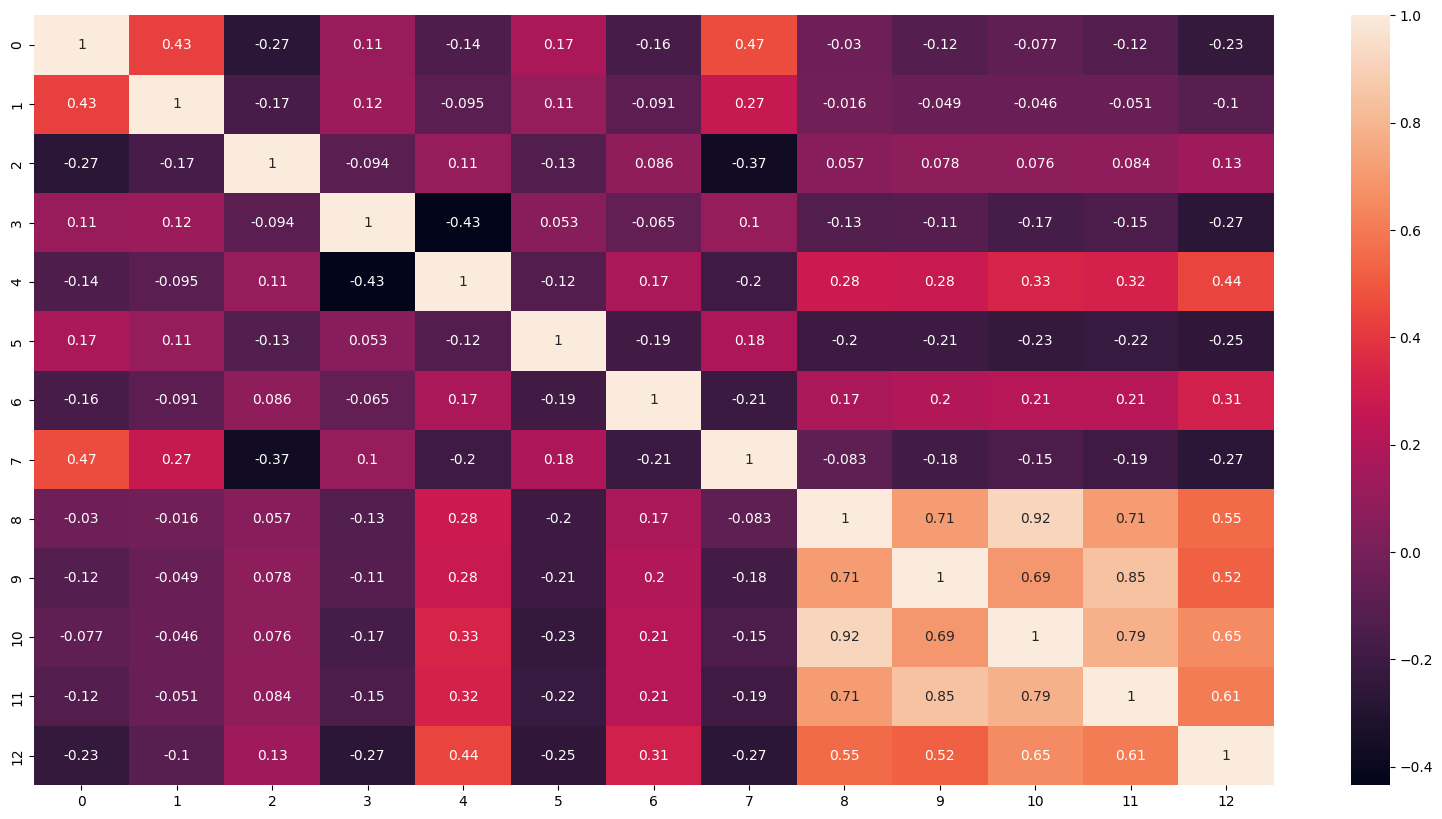

In [21]:
data = np.column_stack([x,y])
data = pd.DataFrame(data)
plt.figure(figsize=(20,10))
sns.heatmap(data.corr() , annot=True)

In [22]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size=0.2 , random_state=10)

In [23]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((2904, 12), (726, 12), (2904,), (726,))

In [24]:
model = DecisionTreeClassifier(random_state=42)
params = {
    'splitter': ["best", "random"],
    'max_depth': np.arange(1,10,1),
    'min_samples_leaf': np.arange(1,5,1),
    'min_samples_split': np.arange(2,5,1)
}
cv_dt = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1, cv=5)
cv_dt.fit(xtrain, ytrain)
best_DT = cv_dt.best_estimator_
y_pred = best_DT.predict(xtest)
print(cv_dt.best_params_ , cv_dt.best_score_)


{'max_depth': np.int64(2), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2), 'splitter': 'best'} 0.8829242091518784


In [25]:
print(classification_report(ytest , y_pred , digits=4))

              precision    recall  f1-score   support

           0     0.8831    0.8327    0.8571       245
           1     0.9172    0.9439    0.9303       481

    accuracy                         0.9063       726
   macro avg     0.9001    0.8883    0.8937       726
weighted avg     0.9057    0.9063    0.9056       726



In [26]:
model = RandomForestClassifier(random_state=42)
params = {'n_estimators': np.arange(100, 500, 100)}
cv_rf = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1, cv=5, verbose=3)
cv_rf.fit(xtrain, ytrain)
best_RF = cv_rf.best_estimator_
y_predrf = best_RF.predict(xtest)
print(cv_rf.best_params_, cv_rf.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_estimators': np.int64(300)} 0.8839575048964331


In [27]:
print(classification_report(ytest , y_predrf , digits=4))

              precision    recall  f1-score   support

           0     0.9200    0.8449    0.8809       245
           1     0.9242    0.9626    0.9430       481

    accuracy                         0.9229       726
   macro avg     0.9221    0.9037    0.9119       726
weighted avg     0.9228    0.9229    0.9220       726



In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

params = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 15, 2),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

cv_xgb = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=20,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    verbose=3,
    random_state=42
)

cv_xgb.fit(xtrain, ytrain)

best_XGB = cv_xgb.best_estimator_

y_predxg = best_XGB.predict(xtest)

print("Best Params:", cv_xgb.best_params_)
print("Best CV Score:", cv_xgb.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 1.0, 'n_estimators': np.int64(100), 'max_depth': np.int64(5), 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best CV Score: 0.8887809365540982


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:07:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [29]:
print(classification_report(ytest , y_predxg , digits=4))

              precision    recall  f1-score   support

           0     0.9127    0.8531    0.8819       245
           1     0.9276    0.9584    0.9427       481

    accuracy                         0.9229       726
   macro avg     0.9201    0.9057    0.9123       726
weighted avg     0.9225    0.9229    0.9222       726



In [30]:
vot = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth = np.int64(2), min_samples_leaf = np.int64(1), min_samples_split = np.int64(2), splitter = 'best')),
    ('rf', RandomForestClassifier(n_estimators=300)),
    ('xgb', XGBClassifier(subsample = 1.0, n_estimators = np.int64(100), max_depth = np.int64(5), learning_rate = 0.05, gamma = 0.2, colsample_bytree = 0.8))
] , voting='soft')

vot.fit(xtrain, ytrain)

y_pred = vot.predict(xtest)

print(classification_report(ytest, y_pred , digits=4))


              precision    recall  f1-score   support

           0     0.9231    0.8327    0.8755       245
           1     0.9188    0.9647    0.9412       481

    accuracy                         0.9201       726
   macro avg     0.9209    0.8987    0.9084       726
weighted avg     0.9203    0.9201    0.9190       726

